In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 


In [2]:
#Loading datasets
df2 = pd.read_csv('kc_house_data_test_features.csv', index_col=0)
df1 = pd.read_csv('kc_house_data_train.csv', index_col=0)

.shape, .column, .info, .describe

In [ ]:
df1.nunique(axis=0)

In [ ]:
df1.corr()

In [ ]:
corr = df1.drop(columns = ['id']).corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, \
            annot=False, cmap='bwr', center= 0)

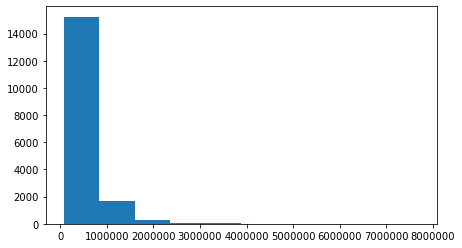

In [3]:
figure = plt.figure(figsize = (7,4))
plt.hist(df1['price']);

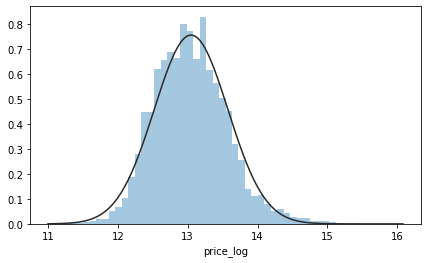

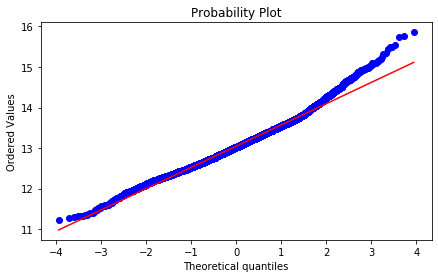

In [4]:
#transformed histogram and normal probability plot
df1['price_log'] = np.log(df1['price'])
from scipy import stats
from scipy.stats import norm
fig = plt.figure(figsize = (7,4))
sns.distplot(df1['price_log'], fit=norm,  bins=50, kde=False);
fig = plt.figure(figsize = (7,4))
res = stats.probplot(df1['price_log'], plot=plt)

In [5]:
df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,...,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,-0.002317
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,...,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.886244
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,...,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665,0.343370
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,...,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.551547
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,...,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.696895
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,...,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.097651
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,...,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.312198
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,...,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.183123
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,...,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,0.346461
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,...,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,0.040469


In [13]:
!pip install missingno
import missingno as msno
# Visualizing missing values
msno.bar(df1)

In [11]:
pd.set_option('display.max_columns', None)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428


In [29]:
df1.loc[(df1['bathrooms'] == 0) | (df1['bedrooms'] == 0)].shape
# there are 14 rows that are true to this condition. since no house can have 0
# bedrooms or 0 bathrooms, we will have to find a way to impute of remove.
#considering the large sample, removing the 14 rows may be a very small price to pay
# for missing values

(14, 21)

In [19]:
df1['bathroom']

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: bathroom, Length: 17290, dtype: int64

In [1]:
# df1.plot(kind="scatter", x="long", y="lat", alpha=0.05, figsize = (10, 10), s = 1, \
#                c = 'price', cmap=plt.get_cmap("jet"), colorbar=False)

In [53]:
zipcode= list(df1['zipcode'].unique())

In [82]:
house_count = {}

In [80]:
# for key, value in house_count_dict.items():
#     print(key)
values = list(df1['zipcode'].value_counts().values)
keys = list(df1['zipcode'].value_counts().index)

In [83]:
house_count = dict(zip(keys, values))
         

In [110]:
# df1['num_houses_in_zip'] = 
num_houses = []
for key, value in house_count.items():
    for x in df1['zipcode']:
        if x == key:
            num_houses.append(value)
df1['num_houses_in_zip'] = num_houses
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,num_houses_in_zip
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,474
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,474
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,474
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,474
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,474


In [112]:
df1['price'].corr(df['num_houses_in_zip'])

0.012501068613778607

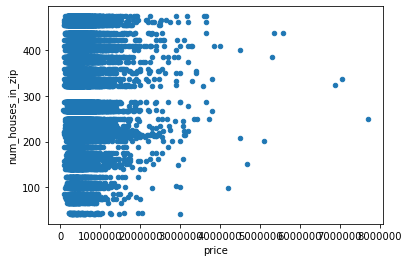

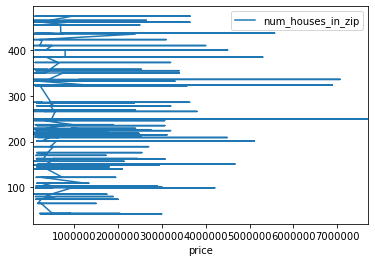

In [121]:
df1.plot.scatter(x ='price', y = 'num_houses_in_zip')
df1.plot(x ='price', y = 'num_houses_in_zip')

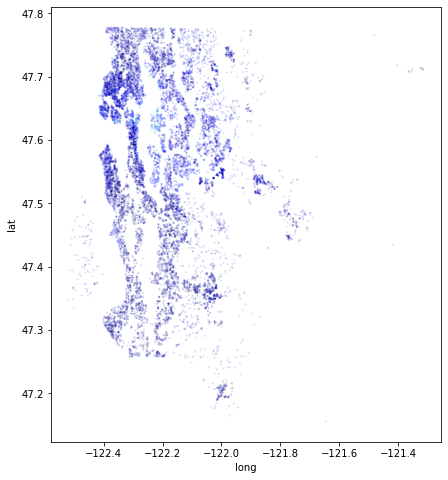

In [117]:
df1.plot(kind="scatter", x="long", y="lat", alpha=0.1, figsize = (7,8), \
               s = 1, \
               c = df1['price'], cmap=plt.get_cmap("jet"), colorbar=False)
# the prices go up when you go from south to north. latitude is a better indicator of location for signaling changes in house values

In [6]:
df1['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [7]:
df1['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [21]:
pd.set_option('display.max_columns', None)


df1[df1['waterfront']==1].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
67,7204200025,20141028T000000,1225000.0,4,2.50,3120,49456,2.0,1,4,4,9,2590,530,1974,1989,98198,47.3535,-122.323,2030,32181,14.018451
238,4114601570,20141118T000000,3600000.0,3,3.25,5020,12431,2.0,1,4,3,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620,15.096444
260,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810,15.110238
494,3761700053,20150105T000000,2150000.0,3,2.75,3470,9610,3.0,1,4,3,11,3470,0,1989,2000,98034,47.7205,-122.260,4130,11875,14.580978
544,1568100920,20150408T000000,1950000.0,4,2.50,3440,14554,2.0,1,4,3,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810,14.483340


In [23]:
df1['date']

0        20141006T000000
1        20140821T000000
2        20140815T000000
3        20150331T000000
4        20140714T000000
              ...       
17285    20150303T000000
17286    20140520T000000
17287    20140514T000000
17288    20141204T000000
17289    20150116T000000
Name: date, Length: 17290, dtype: object

In [38]:
# df['title_year']= 
# pd.to_datetime(df1['date'], format='%Y')
# from datetime import datetime
# datetime.strptime("20141006T000000", "%d/%m/%y %
a = '20141006T000000'
a[:8]

'20141006'

In [32]:
df1['date1'] = df1['date'].apply(lambda x: x[:8])

In [42]:
# df['title_year']= 
df1['date1'].astype(float)
df1['date2']= pd.to_datetime(df1['date1'], format='%Y/%m/%d')


In [46]:
df1['date2']

0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date2, Length: 17290, dtype: datetime64[ns]

In [78]:
# a = 
# df1[sale_month]
# for date in df1['date2']:
#     if date.month in [1, 2, 3]:
#         df1['sale_quarter'] = 1
#     if date.month in [4, 5, 6]:
#         df1['sale_quarter'] = 2
#     if date.month in [7, 8, 9]:
#         df1['sale_quarter'] = 3
#     if date.month in [10, 11, 12]:
#         df1['sale_quarter'] = 4

def completed_quarter(dt):
    prev_quarter_map = ((4, -1), (1, 0), (2, 0), (3, 0))
    quarter, yd = prev_quarter_map[(dt.month - 1) // 3]
    return (quarter)

# for date in df1['date2']:
df1['sale_quarter'] = [completed_quarter(date) for date in df1['date2']]

In [83]:
df1['sale_quarter'].value_counts()

1    5485
2    4710
3    3817
4    3278
Name: sale_quarter, dtype: int64

In [84]:
df1['sale_quarter'].corr(df1['price_log'])

-0.04748663451078145

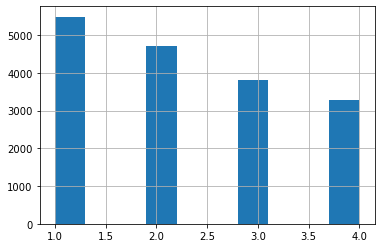

In [85]:
df1['sale_quarter'].hist()